In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#generate some random blobs to classify as either purple or yellow
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


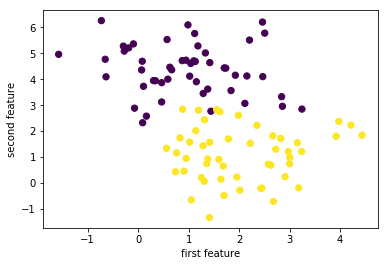

In [3]:
#since the data is two dimensional, we can plot the data in 2D space
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

In [7]:
#import the model from sklearn and split the data into training and testing (default is 25%test 75%train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
#instantiate the Logistic Regression model as "classifier"
classifier = LogisticRegression()

In [11]:
X_train.shape

(75, 2)

In [12]:
y_train.shape

(75,)

In [13]:
#build the model from our training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#We can then apply the model to unseen data and use the model to predict the estimated outcome using the predict method:

prediction = classifier.predict(X_test)

In [15]:
#We can compare these against the true labels:print(prediction)
print(y_test)

[1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1]
[1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1]


In [16]:
#We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called accuracy:

np.mean(prediction == y_test)

0.92000000000000004

In [17]:
# this does the same thing, "Score" the model...It is often helpful to compare the generalization performance 
# (on the test set) to the performance on the training set:

classifier.score(X_train, y_train)

0.92000000000000004

In [19]:
# LogisticRegression is a so-called linear model, that means it will create a decision that is linear in the input space. 
# In 2d, this simply means it finds a line to separate the blue from the red:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.02974678 -1.43697237]]
[ 2.09263249]


In [ ]:
'''
Another popular and easy to understand classifier is K nearest neighbors (kNN). 
It has one of the simplest learning strategies: given a new, unknown observation, 
look up in your reference database which ones have the closest features and assign the predominant class.
The interface is exactly the same as for LogisticRegression above
'''



In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
#fit the model with the training data:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
knn.score(X_test, y_test)

0.95999999999999996

In [52]:
#if we want to apply the k-NN classifier to the iris dataset:
from sklearn.datasets import load_iris
iris=load_iris()

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
knn.score(X_test, y_test)

0.94736842105263153